**Predictive Analytics Harga Sewa Rumah**

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

# **Data Loading**

Mengimpor libary yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile

from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanbyu","key":"6315917ff5833a191af787ea7c399e2b"}'}

In [4]:
# Memuat dataset
!mkdir HouseRent
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset -p /content/HouseRent/

  0% 0.00/82.4k [00:00<?, ?B/s]
100% 82.4k/82.4k [00:00<00:00, 56.4MB/s]


Mengekstraksi file zip dataset dan memuat dataset untuk menampilkan DataFrame

In [5]:
# Mengekstraksi file zip dataset
!unzip "/content/HouseRent/house-rent-prediction-dataset.zip" -d /content/HouseRent/

Archive:  /content/HouseRent/house-rent-prediction-dataset.zip
  inflating: /content/HouseRent/Dataset Glossary.txt  
  inflating: /content/HouseRent/House_Rent_Dataset.csv  


In [6]:
# Memuat dan menampilkan DataFrame
HouseRent = pd.read_csv('/content/HouseRent/House_Rent_Dataset.csv')
HouseRent

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


Didapatkan informasi bahwa terdapat 4746 records dan 12 kolom yaitu: BHK, Rent, Size, Floor, Area Type, Area Locality, City, Furnishing Status, Tenant Preferred, Bathroom, dan Point of Contact

# **Exploratory Data Analysis - Deskripsi Variabel**

- BHK: Jumlah kamar tidur (bedrooms), aula (hall), dapur (kitchen).
- Rent: Harga sewa rumah/apartemen/rumah susun.
- Size: Ukuran (ft<sup>2</sup>) rumah/apartemen/rumah susun.
- Floor: Letak lantai dan jumlah total lantai rumah/apartemen/rumah susun (contoh: lantai ground dari 2, 3 dari 5, dll.)
- Area Type: Ukuran rumah/apartemen/rumah susun dengan kategori Super Area, Area Karpet atau Area Bangunan.
- Area Locality: Letak lokasi rumah/apartemen/rumah susun.
- City: Kota letak rumah/apartemen/rumah susun berada.
- Furnishing Status: Status perabotan rumah/apartemen/rumah susun dengan kategori Furnished (berperabot), Semi-Furnished (sedikit perabotan), dan Unfurnished (tidak memiliki perabotan).
- Tenant Preferred: Jenis penyewa yang diutamakan oleh pemilik.
- Bathroom: Jumlah kamar mandi.
- Point of Contact: Siapa yang harus dihubungi untuk informasi lebih lanjut tentang rumah/apartemen/rumah susun.


In [7]:
# Mengecek informasi pada dataset
HouseRent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Dari output diatas terlihat bahwa:
-	Terdapat 4 kolom numerik dengan tipe data int64, yaitu: BHK, Rent, Size, dan Bathroom.
-	Terdapat 8 kolom categorical dengan tipe object, yaitu: Posted On, Floor, Area Type, Area Locality, City, Furnishing Status, Tenant Preferred, dan  Point of Contact.


In [8]:
# Melihat deskripsi statistik data
HouseRent.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Diketahui tidak ada nilai 0 pada nilai minimum, sehingga dapat dikatakan tidak ada missing value pada dataset.

# **Menangani Outliers**

Memvisualisasikan dataset dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik.

**- Fitur BHK (Bedrooms, Hall, Kitchen)**

<Axes: xlabel='BHK'>

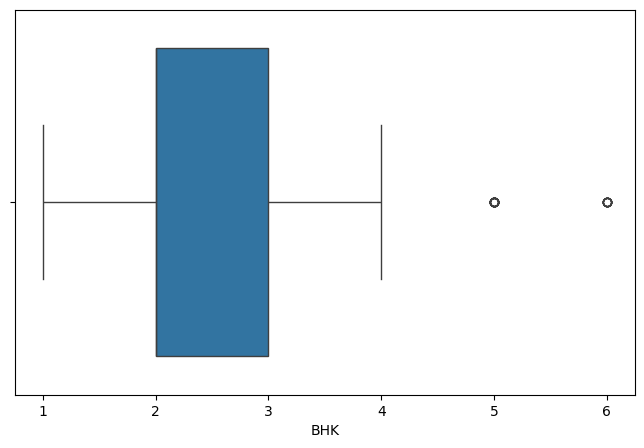

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=HouseRent['BHK'])

**- Fitur Size**

<Axes: xlabel='Size'>

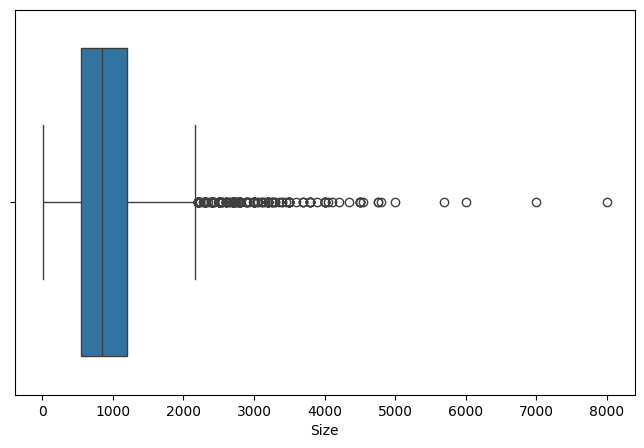

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=HouseRent['Size'])

**- Fitur Bathroom**

<Axes: xlabel='Bathroom'>

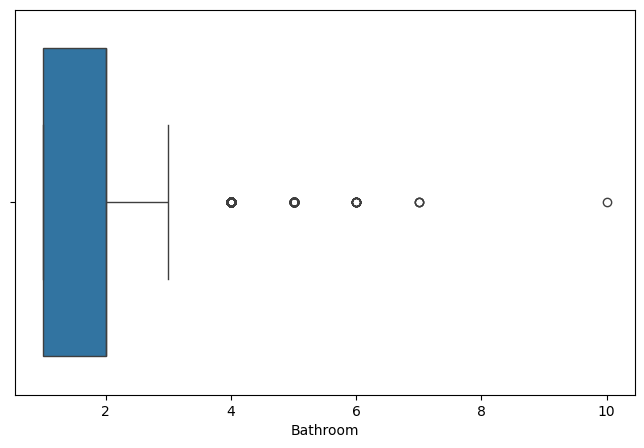

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=HouseRent['Bathroom'])

Terdapat beberapa outliers pada dataset, sehingga dalam menangani outliers tersebut digunakan metode IQR dengan membuat batas bawah dan batas atas dengan persamaan:

Batas bawah = Q1 - 1.5 * IQR

Batas atas  = Q3 + 1.5 * IQR

In [12]:
# Mengatasi outliers dengan metode IQR
Q1 = pd.Series(HouseRent.quantile(0.25, numeric_only=True), index=HouseRent.columns)
Q3 = pd.Series(HouseRent.quantile(0.75, numeric_only=True), index=HouseRent.columns)
IQR = Q3 - Q1
HouseRent = HouseRent[~((HouseRent < (Q1 - 1.5 * IQR)) | (HouseRent > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah drop outliers
HouseRent.shape

(4131, 12)

## **Hasil Penanganan Outliers**

**- Fitur BHK (Bedrooms, Hall, Kitchen)**

<Axes: xlabel='BHK'>

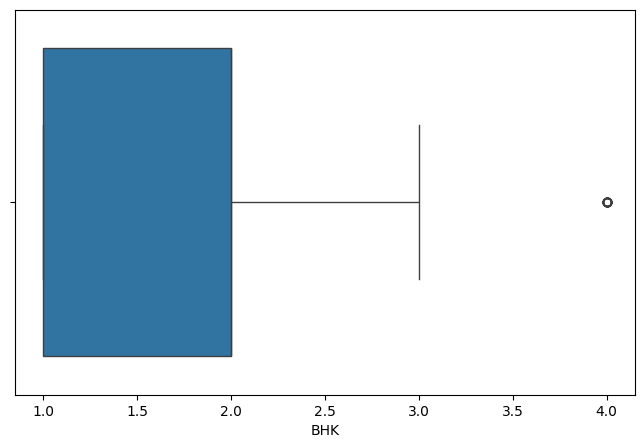

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=HouseRent['BHK'])

**- Fitur Size**

<Axes: xlabel='Size'>

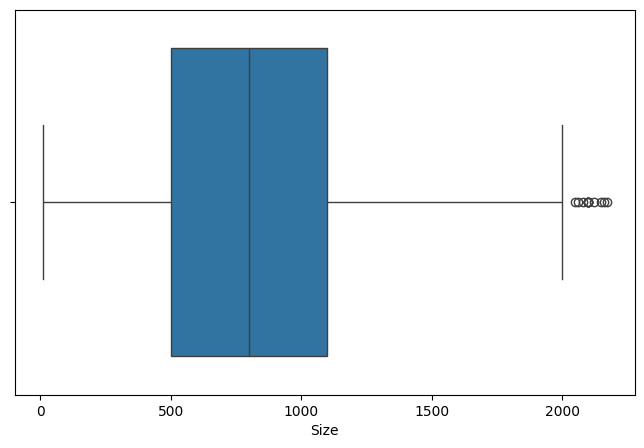

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=HouseRent['Size'])

**- Fitur Bathroom**

<Axes: xlabel='Bathroom'>

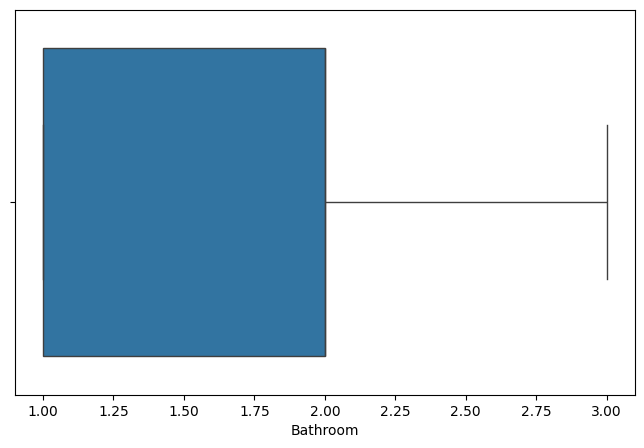

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=HouseRent['Bathroom'])

# **Exploratory Data Analysis - Univariate Analysis**

In [16]:
# Menampilkan 5 data teratas pada dataset
HouseRent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Diketahui pada tabel diatas terdapat 2 fitur yang tidak berpengaruh terhadap prediksi sewa rumah yaitu: Posted On dan Point of Contact, maka kedua fitur ini akan dihapus

In [17]:
# Menghapus fitur yang tidak digunakan yaitu fitur "Posted On" dan "Point of Contract"
HouseRent = HouseRent.drop(['Posted On', 'Point of Contact'], axis=1)

In [18]:
# Mengecek sample pada fitur "Area Type"
HouseRent.groupby('Area Type').agg('count')

,BHK,Rent,Size,Floor,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
Area Type,,,,,,,,,
Built Area,2,2,2,2,2,2,2,2,2
Carpet Area,1799,1799,1799,1799,1799,1799,1799,1799,1799
Super Area,2330,2330,2330,2330,2330,2330,2330,2330,2330


Diketahui terdapat sample yang terlalu sedikit pada Built Area di fitur Area Type. Maka akan dilakukan penghapusan terhadap Built Area.

In [19]:
# Menghapus sample "Built Area"
HouseRent.drop(HouseRent.index[HouseRent['Area Type'] == 'Built Area'], inplace=True)

In [20]:
# Mengecek nilai unique length pada masing-masing fitur
floor = HouseRent.groupby('Floor').size().agg('count')
area_type = HouseRent.groupby('Area Type').size().agg('count')
area_locality = HouseRent.groupby('Area Locality').size().agg('count')
city = HouseRent.groupby('City').size().agg('count')
furnishing_status = HouseRent.groupby('Furnishing Status').size().agg('count')
tenant_preferred = HouseRent.groupby('Tenant Preferred').size().agg('count')

print('Feature Unique Length\n')
print('Floor             :', floor)
print('Area Type         :', area_type)
print('Area Locality     :', area_locality)
print('City              :', city)
print('Furnishing Status :', furnishing_status)
print('Tenant Preferred  :', tenant_preferred)

Feature Unique Length

Floor             : 332
Area Type         : 2
Area Locality     : 1971
City              : 6
Furnishing Status : 3
Tenant Preferred  : 3


Dapat dilihat pada output diatas bahwa fitur Floor dan Area Locality memiliki nilai unique length yang terlalu tinggi jika dibandingkan dengan fitur lainnya. Maka kedua fitur ini akan dihapus.

In [21]:
# Menghapus fitur "Floor" dan "Area Locality"
HouseRent = HouseRent.drop(['Floor', 'Area Locality'], axis=1)

HouseRent

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2


In [22]:
# Mengecek informasi pada dataset
HouseRent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4129 non-null   int64 
 1   Rent               4129 non-null   int64 
 2   Size               4129 non-null   int64 
 3   Area Type          4129 non-null   object
 4   City               4129 non-null   object
 5   Furnishing Status  4129 non-null   object
 6   Tenant Preferred   4129 non-null   object
 7   Bathroom           4129 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 290.3+ KB


Langkah selanjutnya membagi fitur pada dataset menjadi numerical features dan categorical features.

In [23]:
numerical_features = ['BHK', 'Rent', 'Size', 'Bathroom']
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

## **Categorical Features**
Melakukan analisis terhadap fitur kategori

##### **Fitur Area Type**

             Jumlah Sampel  Persentase
Super Area            2330        56.4
Carpet Area           1799        43.6


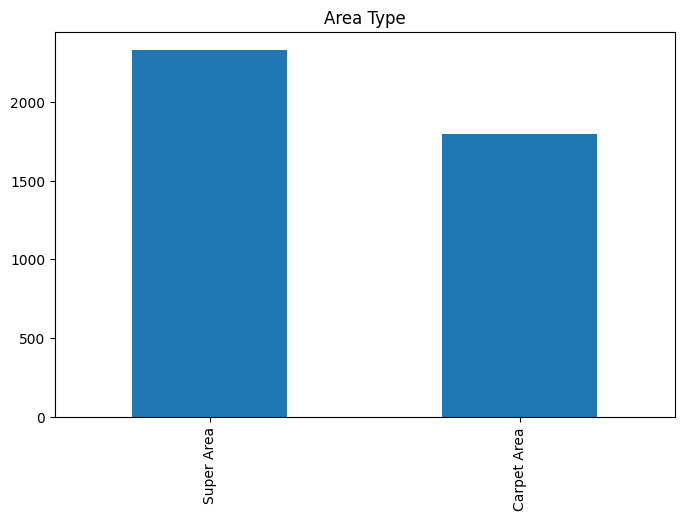

In [24]:
# Memvisualisasikan categorical features "Area Type"
plt.figure(figsize=(8, 5))
feature = categorical_features[0]
count = HouseRent[feature].value_counts()
percent = 100 * HouseRent[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar', title=feature);

Dari visualisasi fitur Area Type diatas terdapat 2 kategori pada fitur Area Type, secara berurutan dari yang paling banyak yaitu: Super Area, lalu Carpet Area. Dari data persentase dapat disimpulkan bahwa lebih dari 50% sampel merupakan rumah tipe grade tinggi, yaitu Super Area.

##### **Fitur City**

           Jumlah Sampel  Persentase
Bangalore            840        20.3
Chennai              830        20.1
Hyderabad            803        19.4
Mumbai               602        14.6
Delhi                538        13.0
Kolkata              516        12.5


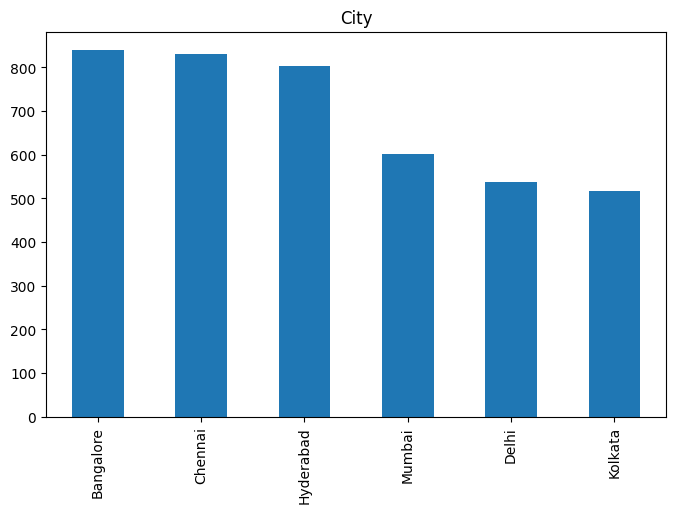

In [25]:
# Memvisualisasikan categorical features "City"
plt.figure(figsize=(8, 5))
feature = categorical_features[1]
count = HouseRent[feature].value_counts()
percent = 100 * HouseRent[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi dari visualisasi diatas, urutan kategori letak rumah/apartemen/rumah susun di kota yang paling sedikit ke yang paling banyak adalah Kolkata-Delhi-Mumbai-Hyderabad-Chenmai-Bangalore. Dari grafik diatas dapat disimpulkan bahwa sebagian besar letak rumah/apartemen/rumah susun dari yang paling banyak berada pada kota Bangalore, Chennai, dan Hyderadab.

##### **Fitur Furnishing Status**

                Jumlah Sampel  Persentase
Semi-Furnished           1931        46.8
Unfurnished              1697        41.1
Furnished                 501        12.1


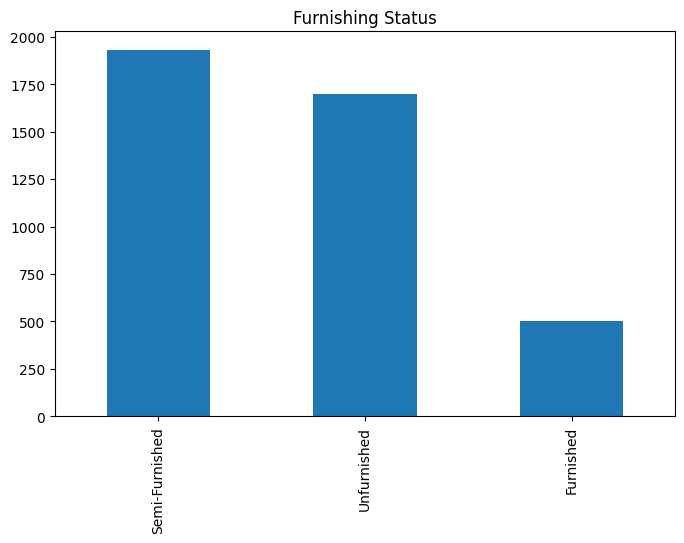

In [26]:
# Memvisualisasikan categorical features "Furnishing Status"
plt.figure(figsize=(8, 5))
feature = categorical_features[2]
count = HouseRent[feature].value_counts()
percent = 100 * HouseRent[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})

print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi visualisasi diatas, fitur Furnishing Status terdiri dari 3 kategori dari yang paling sedikit ke yang paling banyak, yaitu: Furnished (memiliki perabotan), Unfurnished (tidak ada perabotan), Semi-Furnished (memiliki sebagian perabotan). Dapat disimpulkan bahwa rumah/apartemen/rumah susun yang tersedia lebih banyak yang memiliki sebagian perabotan dan tidak ada perabotan.

### **Numerical Features**

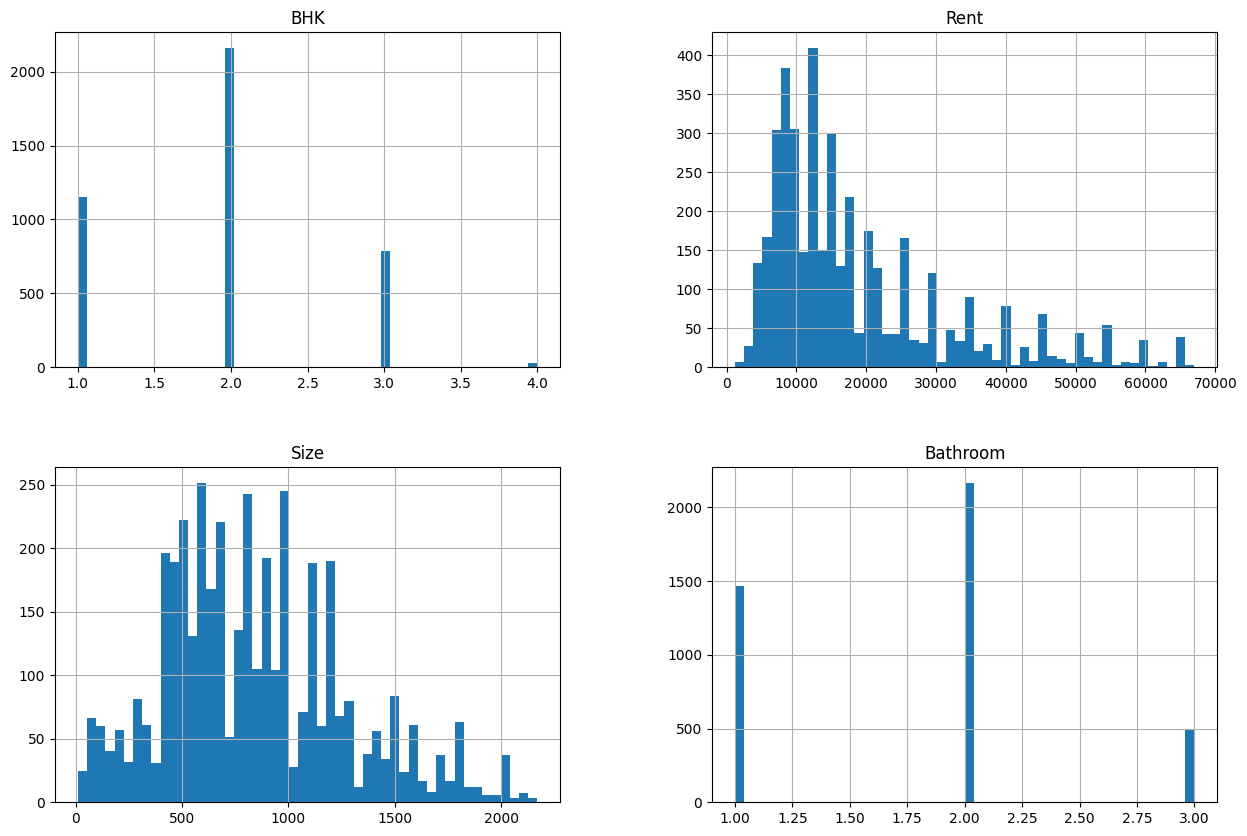

In [27]:
# Menampilkan histogram pada masing-masing numerical features
HouseRent.hist(bins=50, figsize=(15, 10))

plt.show()

Fitur BHK:
- Rumah/apartemen/rumah susun memiliki 1 hingga 3 kamar tidur, aula, dan dapur, namun sebagian besar memiliki 2 kamar tidur, aula, dan dapur.

Fitur Rent:
- Peningkatan harga sewa rumah sebanding dengan penurunan jumlah sampel. Dapat dilihat jelas dari histogram 'Rent' yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Rentang harga sewa rumah hingga sekitar $65000.

- Harga rumah yang banyak disewa sekitar bernilai dibawah $18000.

Fitur Size:
- Rumah/apartemen/rumah susun memiliki ukuran dibawah 2100 (ft<sup>2</sup>), namun sebagian besar memiliki ukuran diantara 500 (ft<sup>2</sup>) hingga 1200 (ft<sup>2</sup>).

Fitur Bathroom:
- Rumah/apartemen/rumah susun memiliki 1 hingga 3 kamar mandi, namun sebagian besar memiliki 2 kamar mandi.

In [28]:
# Mengecek deskripsi statistik data pada fitur "Rent"
HouseRent.Rent.describe()

count     4129.000000
mean     18801.240736
std      13408.800458
min       1200.000000
25%       9500.000000
50%      15000.000000
75%      24000.000000
max      67000.000000
Name: Rent, dtype: float64

# **Exploratory Data Analysis - Multivariate Analysis**

Membuat fitur baru "Price Per Square Feet" berdasarkan fitur "Rent" dan "Size".

In [29]:
new_feature = HouseRent['Price Per Square Feet']=HouseRent['Rent'] * 1000 / HouseRent['Size']

# Menampilkan 5 data teratas pada dataset
HouseRent.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price Per Square Feet
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


## **Categorical Features**
Mengecek rata-rata sewa rumah/apartemen/rumah susun terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap sewa rumah/apartemen/rumah susun.

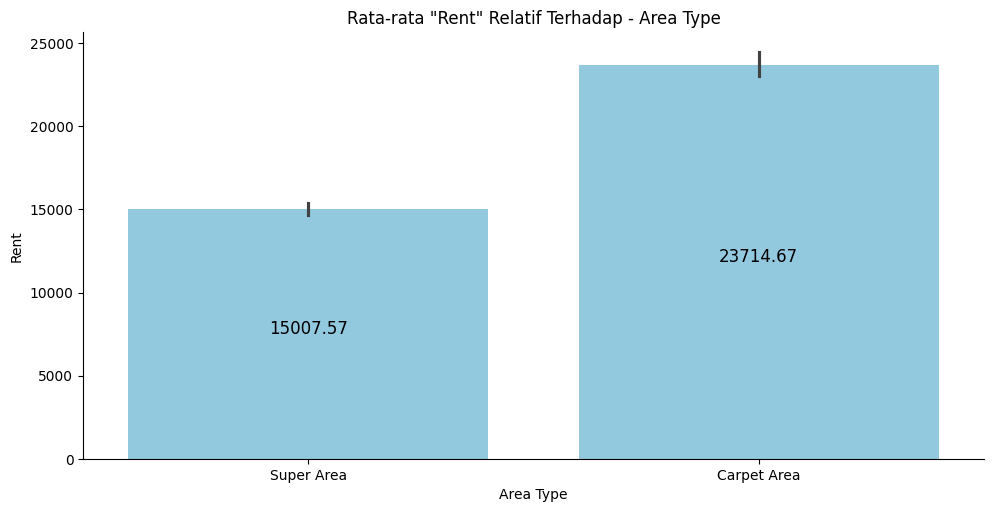

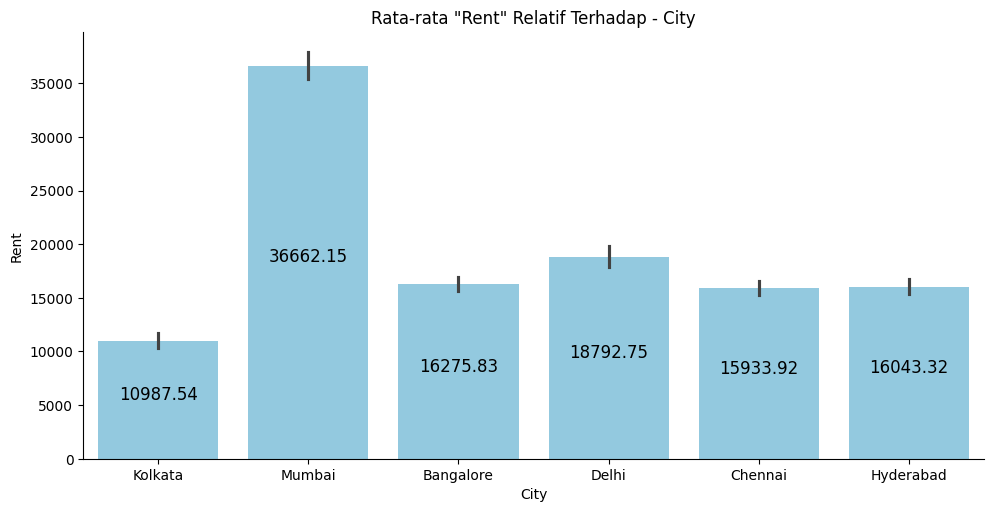

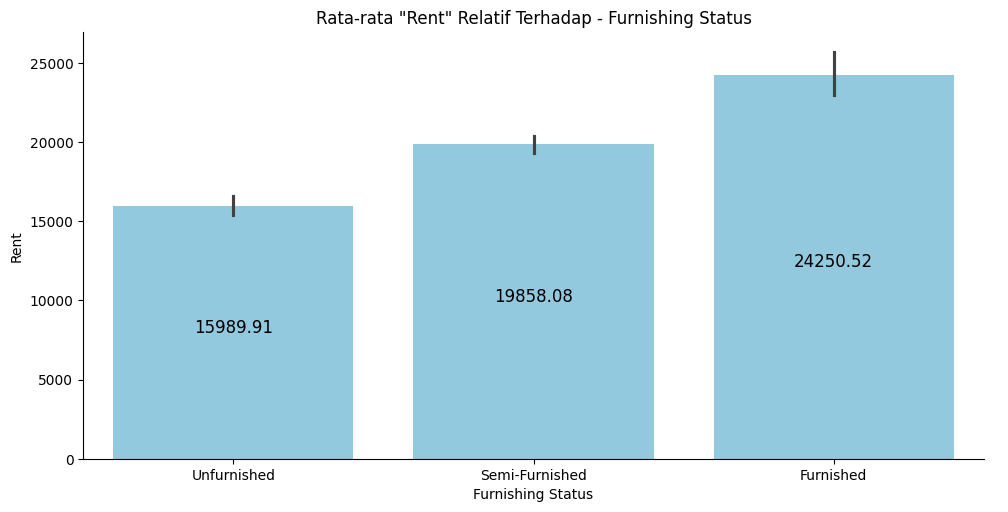

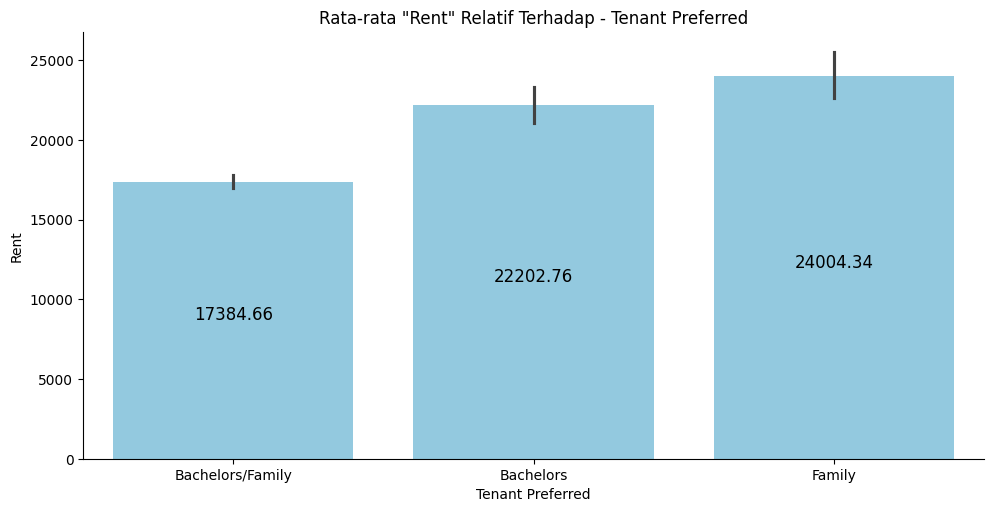

In [30]:
# Mengecek rata-rata sewa rumah terhadap masing-masing fitur
cat_features = HouseRent.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  catplot = sns.catplot(x=col, y='Rent', kind='bar', dodge=False, height=5, aspect=2, data=HouseRent, color='skyblue')
  plt.title('Rata-rata "Rent" Relatif Terhadap - {}'.format(col))

  # Menambahkan label nilai pada setiap bar
  ax = catplot.ax
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2, '{0:.2f}'.format(p.get_height()),
            fontsize=12, color='black', ha='center')

  plt.show()

- Pada fitur Area Type, rata-rata sewa berada antara \$15007 hingga \$23714. Tipe grade tertinggi yaitu Super Area memiliki sewa yang rendah jika dibandingkan dengan sewa tipe grade dibawahnya yaitu Carpet Area. Dalam hal ini fitur Area Type memiliki pengaruh yang kecil.
- Pada fitur City, rata-rata sewa berada antara \$10987 hingga \$36662. Kota Bangalore, Chennai, dan hyderabad memiliki sewa yang rendah jika dibandingkan dengan sewa kota Mumbai. Dalam hal ini fitur City memiliki pangaruh yang cukup besar.
- Pada fitur Furnishing Status, rata-rata sewa berada antara \$15989 hingga \$24250. rumah/apartemen/rumah susun Semi-Furnished dan Unfurnished memiliki sewa yang rendah jika dibandingkan dengan sewa rumah/apartemen/rumah susun yang Furnished. Dalam hal ini fitur Furnishing Status memiliki pengaruh yang cukup besar.
- Pada Fitur Tenant Preferred, rata-rata sewa berada antara \$17384 hingga \$24004. Dari grafik dapat dilihat bahawa Family memiliki sewa yang paling tinggi dibandingkan dengan yang lain. Dalam hal ini fitur Tenant Preferred memiliki pengaruh yang cukup lumayan besar.

## **Numerical Features**
Menampilkan kolerasi antar fitur numerical

Text(0.5, 1.0, '    Correlation Matrix untuk Fitur Numerik\n')

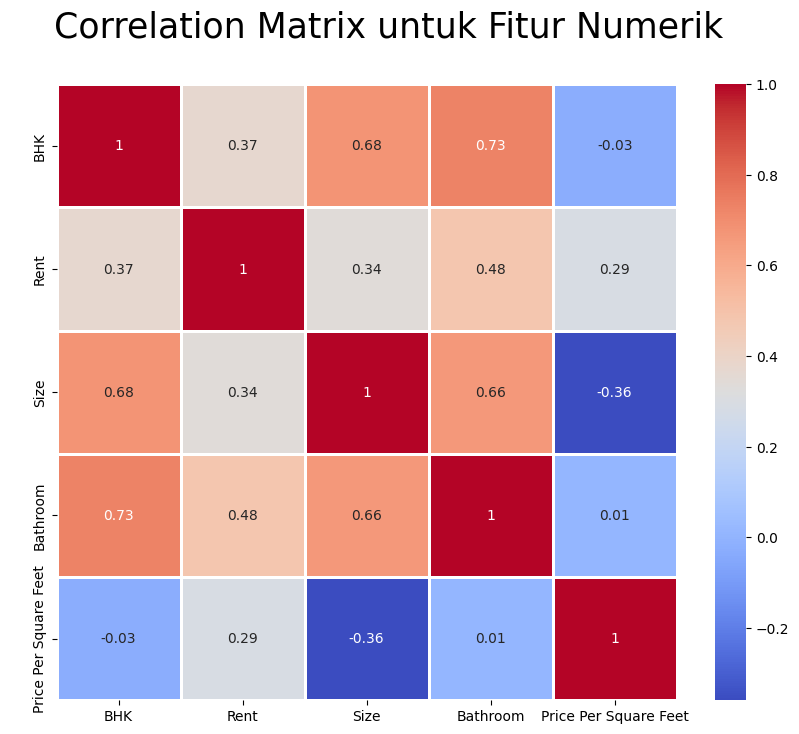

In [31]:
# Mengevaluasi skor korelasinya
plt.figure(figsize=(10, 8))
correlation_matrix = HouseRent.corr(numeric_only=True).round(2)

# Untuk menampilkan nilai didalam kotak
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('    Correlation Matrix untuk Fitur Numerik\n', size=25)

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah. Dapat dilihat kolerasi pada Fitur BHK, Size, dan Bathroom berkolerasi dengan fitur Rent dengan cukup baik. Sementara itu, fitur 'Price Per Square Feet' memiliki korelasi yang kecil (0.29). Sehingga, fitur tersebut akan di-drop.

In [32]:
# Menghapus fitur "Price Per Square Feet" karena memiliki kolerasi yang kecil
HouseRent2 = HouseRent.drop(['Price Per Square Feet'], axis='columns')

HouseRent2.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik\n')

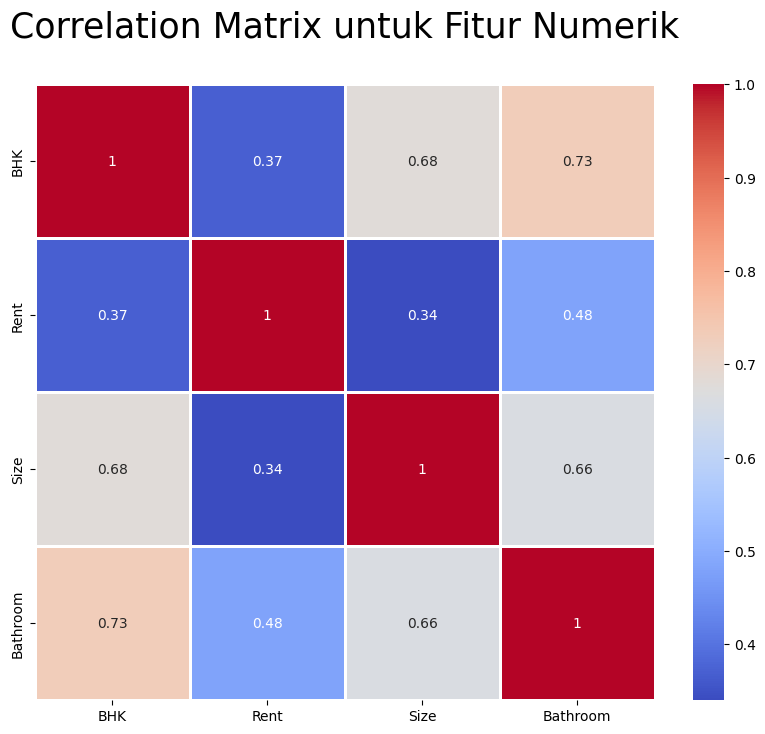

In [33]:
# Mengevaluasi skor korelasinya
plt.figure(figsize=(10, 8))
correlation_matrix = HouseRent2.corr(numeric_only=True).round(2)

# Untuk menampilkan nilai didalam kotak
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix untuk Fitur Numerik\n', size=25,)

# **Data Preparation**

Melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

## **Encoding Fitur Kategori**
Proses encoding fitur categorical menggunakan teknik one-hot-encoding dalam penerapannya untuk mendapatkan fitur  baru yang sesuai sehingga dapat mewakili variabel categorical. Dalam hal ini terdapat fitur categorical yaitu: Area Type, City, Furnishing Status, dan Tenant Preferred yang kemudian akan diubah menjadi numerical features.


In [34]:
# Melakukan proses encoding dengan fitur get_dummies
HouseRent = pd.get_dummies(HouseRent, columns=['Area Type'])
HouseRent = pd.get_dummies(HouseRent, columns=['City'])
HouseRent = pd.get_dummies(HouseRent, columns=['Furnishing Status'])
HouseRent = pd.get_dummies(HouseRent, columns=['Tenant Preferred'])

HouseRent

,BHK,Rent,Size,Bathroom,Price Per Square Feet,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,9090.909091,0,1,0,0,0,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,25000.000000,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1,17000.000000,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1,12500.000000,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,8823.529412,1,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,15000.000000,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4742,3,29000,2000,3,14500.000000,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4743,3,35000,1750,3,20000.000000,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4744,3,45000,1500,2,30000.000000,1,0,0,0,0,1,0,0,0,1,0,0,0,1


## **Train-Test-Split**
Melakukan pembagian dataset menjadi data latih (train) dan data uji (test) dengan mempertahankan sebagian data  yang ada untuk menguji seberapa baik generalisasi model terhadap data baru. Pembagian data dilakukan sebelum proses transformasi data, sehingga dapat mengurangi potensi kebocoran data (data leakage). Dalam hal ini jumlah data sebesar 4.129 akan dibagi dengan rasio 75:25 menjadi 3.096 data latih dan 1.033 data uji.

In [35]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
X = HouseRent.drop(['Rent'], axis=1)
y = HouseRent['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Mengecek jumlah sampel pada masing-masing bagian
print(f'Total # of sample in whole dataset : {len(X)}')
print(f'Total # of sample in train dataset : {len(X_train)}')
print(f'Total # of sample in test dataset  :  {len(X_test)}')

Total # of sample in whole dataset : 4129
Total # of sample in train dataset : 3096
Total # of sample in test dataset  :  1033


## **Standarisasi**
Untuk menghindari kebocoran informasi pada data uji, teknik StandardScaler dari library Scikitlearn digunakan dalam tahapan transformasi data numerical. Proses  standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [36]:
# Melakukan standarisasi terhadap data latih
numerical_features = ['BHK', 'Bathroom', 'Size']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BHK,Bathroom,Size
1232,0.101369,0.368584,-0.448236
2991,-1.318716,-1.154962,-0.448236
3377,0.101369,0.368584,0.137304
1806,0.101369,0.368584,1.064799
2910,1.521455,0.368584,0.957060


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [37]:
# Mengecek nilai mean dan standar deviasi setelah proses standarisasi data latih
X_train[numerical_features].describe().round(4)

,BHK,Bathroom,Size
count,3096.0000,3096.0000,3096.0000
mean,-0.0000,0.0000,-0.0000
std,1.0002,1.0002,1.0002
min,-1.3187,-1.1550,-1.9121
25%,-1.3187,-1.1550,-0.7996
50%,0.1014,0.3686,-0.0969
75%,0.1014,0.3686,0.6057
max,2.9415,1.8921,3.1118


In [38]:
# Melakukan standarisasi terhadap data uji
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

X_test[numerical_features].head()

,BHK,Bathroom,Size
3821,-1.318716,0.368584,-0.448236
3807,0.101369,0.368584,-0.331128
555,-1.318716,-1.154962,-0.916668
3833,1.521455,1.892129,1.268567
4458,-1.318716,-1.154962,0.113882


In [39]:
# Mengecek nilai mean dan standar deviasi setelah proses standarisasi data uji
X_test[numerical_features].describe().round(4)

,BHK,Bathroom,Size
count,1033.0000,1033.0000,1033.0000
mean,-0.0196,0.0485,-0.0207
std,0.9830,0.9549,0.9999
min,-1.3187,-1.1550,-1.9472
25%,-1.3187,-1.1550,-0.7761
50%,0.1014,0.3686,-0.1438
75%,0.1014,0.3686,0.6057
max,2.9415,1.8921,3.0650


# **Model Development**
Dalam  mengembangkan model machine learning pada proyek ini digunakan 3 algoritma, yang kemudian akan dievaluasi performa dari masing-masing algoritma dan menentukan salah satu algoritma yang memiliki hasil terbaik dan dengan nilai error yang paling kecil.

In [40]:
# Menyiapkan dataframe untuk analisis menggunakan 3 model algoritma
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## **Model Development dengan K-Nearest Neighbor**
Pada algortima ini menggunakan kesamaan fitur untuk memprediksi nilai dari setiap data yang baru. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat.

In [41]:
# Melatih data dengan algoritma K-Nearest Neighbor untuk melakukan prediksi
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

print('Score:', knn.score(X_test, y_test))

Score: 0.5159262080253231


Parameter n_neighbors digunakan untuk menentukan jumlah tetangga terdekat (dengan k adalah sebuah angka positif).

Score algoritma KNN = 51%

## **Model Development dengan Random Forest**
Algoritma Random Forest adalah salah satu algoritma supervised learning. Algoritma ini disusun dari banyak algoritma pohon (decision tree) yang pembagian data dan fiturnya dipilih secara acak.

In [42]:
# Melatih data dengan algoritma Random Forest untuk melakukan prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=8, random_state=33, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'Random Forest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

print('Score:', RF.score(X_test, y_test))

Score: 0.9826790378279148


- Parameter n_estimators digunakan untuk menentukan jumlah pohon di forest.

- Parameter max_depth digunakan untuk menentukan kedalaman atau panjang pohon. Merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node kedalam jumlah pengamatan yang diinginkan.

- Parameter random_state digunakan untuk mengontrol random number generator yang digunakan.

- Parameter n_jobs digunakan untuk menentukan jumlah job (pekerjaan) yang digunakan secara paralel. Merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel.

Score algoritma Random Forest = 98%

## **Model Development dengan Boosting Algorithm**
Pada algoritma ini model dilatih secara berurutan atau dalam proses yang iteratif. Algoritma yang menggunaakn teknik boosting bertugas memperbaiki kesalahan dari model pertama yang telah dibuat.

In [43]:
# Melatih data dengan Bossting Algorithm untuk melakukan prediksi
boosting = AdaBoostRegressor(learning_rate=0.1, n_estimators=150, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

print('Score:', boosting.score(X_test, y_test))

Score: 0.8480202970704676


- Parameter learning_rate adalah bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.

- Parameter n_estimators digunakan untuk memperkuat kontribusi pada setiap regresor.

- Parameter random_state digunakan untuk mengontrol random number generator yang digunakan.

Score algoritma Boosting = 84%

Sehingga dalam pembuatan model, performa terbaik ditunjukkan oleh algoritma Random Forest yang memiliki hasil akurasi sebesar 98%.

# **Evaluasi Model**
Metrik yang akan digunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

In [44]:
# Membuat variabel untuk Mean Squared Error dengan dataframe data latih dan data uji pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Membuat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Menghitung Mean Squared Error pada masing-masing algoritma dengan data latih dan data uji
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Menampilkan hasil evaluasi pada data latih dan data uji
mse

,train,test
KNN,60847.512857,93295.599863
RF,678.321111,3338.271112
Boosting,22478.006109,29291.066335


Memvisualisasikan metrik MSE.

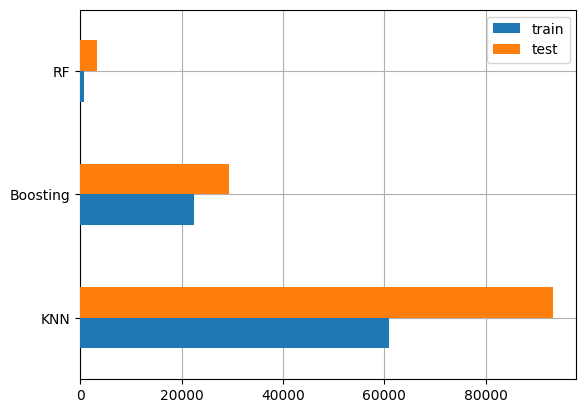

In [45]:
# Menampilkan plot metrik MSE
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari hasil plot metrik MSE diatas, terlihat bahwa algoritma model Random Forest (RF) memiliki hasil yang paling baik dibandingkan dengan algoritma model Boosting dan KNN. Hal ini ditunjukkan karena hasil pengujian model Random Forest memiliki nilai error terkecil dibandingkan dengan dua algoritma lainnya yang memiliki angka error yang besar diatas 20.000.

In [46]:
# Membuat prediksi dari data uji untuk melakukan pengujian
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
3821,14000,18250.0,14075.2,15554.1


Terlihat bahwa prediksi dengan algoritma Random Forest (RF) pada kolom "prediksi_RF" memberikan nilai yang paling mendekati dengan nilai pada kolom "y_true".

In [47]:
# Membuat prediksi dari data uji untuk melakukan pengujian
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
  pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
3821,14000,18250.0,14075.2,15554.1
3807,10000,11750.0,9990.3,10793.5
555,23000,27875.0,24002.4,31947.8
